<a href="https://colab.research.google.com/github/joshgregory42/practical_deep_learning/blob/main/ch_1_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai

from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.168993,0.020758,0.008119,32:08


epoch,train_loss,valid_loss,error_rate,time
0,0.061693,0.005911,0.002706,47:55


In [ ]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [9]:
from PIL import Image

img = Image.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

AttributeError: ignored

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

In [11]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    seed=42, label_func=is_cat, item_tfms=Resize(224)
)

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.8MB/s]


In [14]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [15]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.823132,2.115596,00:47


epoch,train_loss,valid_loss,time
0,1.699365,1.456061,00:51
1,1.541627,1.170150,00:50
2,1.443922,1.145415,00:50
3,1.358654,1.009685,00:50
4,1.246333,0.829290,00:49
5,1.135006,0.777770,00:49
6,1.041683,0.762835,00:49
7,0.969669,0.738994,00:49


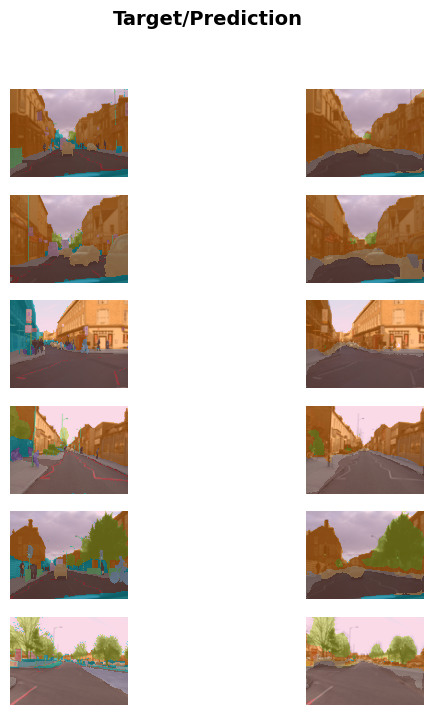

In [16]:
learn.show_results(max_n=6, figsize=(7,8))

In [20]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [18]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.387350,0.368452,0.830313,00:06
1,0.356580,0.361848,0.829545,00:03
2,0.352768,0.357189,0.833845,00:03


In [4]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521913,1.349994,00:00


epoch,train_loss,valid_loss,time
0,1.395144,1.296085,00:00
1,1.302504,1.129414,00:00
2,1.068555,0.827289,00:00
3,0.825614,0.672512,00:00
4,0.703793,0.632750,00:00
5,0.648187,0.617279,00:00
6,0.629925,0.610677,00:00
7,0.606269,0.608220,00:00
8,0.606426,0.606765,00:00
9,0.609104,0.606541,00:00


In [21]:
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time


,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos
1,"xxbos xxmaj films belonging to the "" film noir "" genre usually contain similar elements : a "" deus ex machina "" plot twist that drives the main character headlong into bedlam , a pretty but psychotic girl , a handsome but psychotic thug , lots of money , lots of brutality , and usually a denouement in the desert . xxmaj think "" high xxmaj sierra "" or "" white xxmaj heat . "" \n\n xxmaj there is plenty of hard - boiled bad film noir out there . xxmaj but when film noir is good , you ca n't take your eyes off the train wreck of human lives . \n\n xxmaj it is this latter tradition that "" blind xxmaj spot "" belongs to . xxmaj the film follows xxmaj danny xxmaj alton , a troubled teenager ( superbly played with depth , grace , emotional integrity",pos,pos
2,"xxbos xxmaj watching xxmaj stranger xxmaj than xxmaj fiction director xxmaj marc xxmaj forster 's xxmaj the xxmaj kite xxmaj runner is the cinematic equivalent of eating your vegetables because this art - house epic rated xxup pg-13 is good for your movie - going diet . xxmaj no , this is n't the kind of movie that i like to slouch on the couch and eyeball at the end of a tough day . xxmaj the xxmaj kite xxmaj runner is n't your typical mainstream movie designed to entertain you and make you forget about your troubles . xxmaj first , no celebrity stars appear in it . xxmaj second , nothing is cut and dried , black or white , or so outlandish that you do n't believe an image that you see . xxmaj third , xxmaj the xxmaj kite xxmaj runner lapses into subtitles when the",pos,pos
3,"xxbos i really wanted to be able to give this film a 10 . xxmaj i 've long thought it was my favorite of the four modern live - action xxmaj batman films to date ( and maybe it still will be -- i have yet to watch the xxmaj schumacher films again ) . xxmaj i 'm also starting to become concerned about whether xxmaj i 'm somehow subconsciously being contrarian . xxmaj you see , i always liked the xxmaj schumacher films . xxmaj as far as i can remember , they were either 9s or 10s to me . xxmaj but the conventional wisdom is that the two xxmaj tim xxmaj burton directed films are far superior . i had serious problems with the first xxmaj burton xxmaj batman this time around -- i ended up giving it a 7 - -and apologize as i might ,",pos,pos
4,"xxbos "" buffalo xxmaj bill , xxmaj hero of the xxmaj far xxmaj west "" director xxmaj mario xxmaj costa 's unsavory xxmaj spaghetti western "" the xxmaj beast "" with xxmaj klaus xxmaj kinski could only have been produced in xxmaj europe . xxmaj hollywood would never dared to have made a western about a sexual predator on the prowl as the protagonist of a movie . xxmaj never mind that xxmaj kinski is ideally suited to the role of ' crazy ' xxmaj johnny . xxmaj he plays an individual entirely without sympathy who is ironically dressed from head to toe in a white suit , pants , and hat . xxmaj this low - budget oater has nothing appetizing about it . xxmaj the typically breathtaking xxmaj spanish scenery around xxmaj almeria is nowhere in evidence . xxmaj instead , xxmaj costa and his director of photography",pos,pos
5,"xxbos xxmaj spoilers . xxmaj this review has been edited due to word limit . \n\n ` the horror . xxmaj

In [5]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,0.605014,0.603080,00:00
1,0.589615,0.597028,00:00
2,0.584021,0.595244,00:00


In [6]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')

learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497475,1.418379,00:00


epoch,train_loss,valid_loss,time
0,1.371992,1.359436,00:00
1,1.255124,1.182109,00:00
2,1.023223,0.887733,00:00
3,0.797543,0.749591,00:00
4,0.692296,0.716018,00:00
5,0.647683,0.705613,00:00
6,0.614158,0.699053,00:00
7,0.594451,0.696378,00:00
8,0.588611,0.695672,00:00
9,0.595251,0.695528,00:00
